In [1]:
from utils.bio_utils import *


In [2]:
def genmode(elements,maxlen):
    #only support
    dst = []
    temp1 = []
    temp2 = []
    for element in elements:
        temp2.append(element)
    for i in range(maxlen - 1):
        print('reach {}'.format(i))
        print(len(temp2[-1]))
        print(temp2[-1])
        temp1 = [PreElement for PreElement in temp2]
        temp2 = []
        for element in elements:
            for tempElement in temp1:
                temp2.append(tempElement+element)
                if(len(tempElement + element) > 2):
                    dst.append(tempElement + element)
    return dst

In [3]:

class CNTMODE:
    #len of mode must be no less than 3

    def __init__(self,modes,maxlen):
        self.modes = modes
        self.maxlen = maxlen
        self.mapcnt,self.maptime = self.mapping()
    
    def mapping(self):
        mapcnt = {}
        maptime = {}
        for i in range(self.maxlen - 2):
            maptime[i+3] = {}
            mapcnt[i+3] = {}
        for mode in self.modes:
            mapcnt[len(mode)][mode] = 0
            maptime[len(mode)][mode] = 0
        return mapcnt,maptime
    
    def clear(self):
        for mode in self.modes:
            self.mapcnt[len(mode)][mode] = 0
            self.maptime[len(mode)][mode] = 0
    
    def calmean(self):
        total = {}
        for i in range(self.maxlen-2):
            total[i+3] = 0
        for mode in self.modes:
            total[len(mode)] += self.mapcnt[len(mode)][mode]
        for mode in self.modes:
            self.mapcnt[len(mode)][mode] = float(self.mapcnt[len(mode)][mode])/total[len(mode)]

    def update(self,mode,time,modelen):
        if time - self.maptime[len(mode)][mode] >= modelen:
            self.mapcnt[len(mode)][mode] += 1
            self.maptime[len(mode)][mode] = time
    
    def sor(self,n):
        dst = {}
        for i in range(self.maxlen-2):
            temp = sorted(self.mapcnt[i+3].items(),key = lambda item:item[1],reverse=True)
            dst[i+3] = temp[0:n]
        return dst


In [4]:
ite = [protein for (Nc,protein) in codon_table.items()] 
ite = list(set(ite))
print(ite)

['S', 'F', 'Q', 'I', 'E', 'Y', 'R', 'H', 'N', 'K', 'W', 'A', 'L', 'D', 'G', 'C', 'T', '_', 'V', 'P', 'M']


In [5]:
elements = ite
maxlen = 5
mode = genmode(elements,maxlen)
# print(mode)
print(len(mode))

# cnt44 = CNTMODE(mode,maxlen)
# cnt66 = CNTMODE(mode,maxlen)
# cnt120 = CNTMODE(mode,maxlen)
cnt150 = CNTMODE(mode,maxlen)

reach 0
1
M
reach 1
2
MM
reach 2
3
MMM
reach 3
4
MMMM
4287843


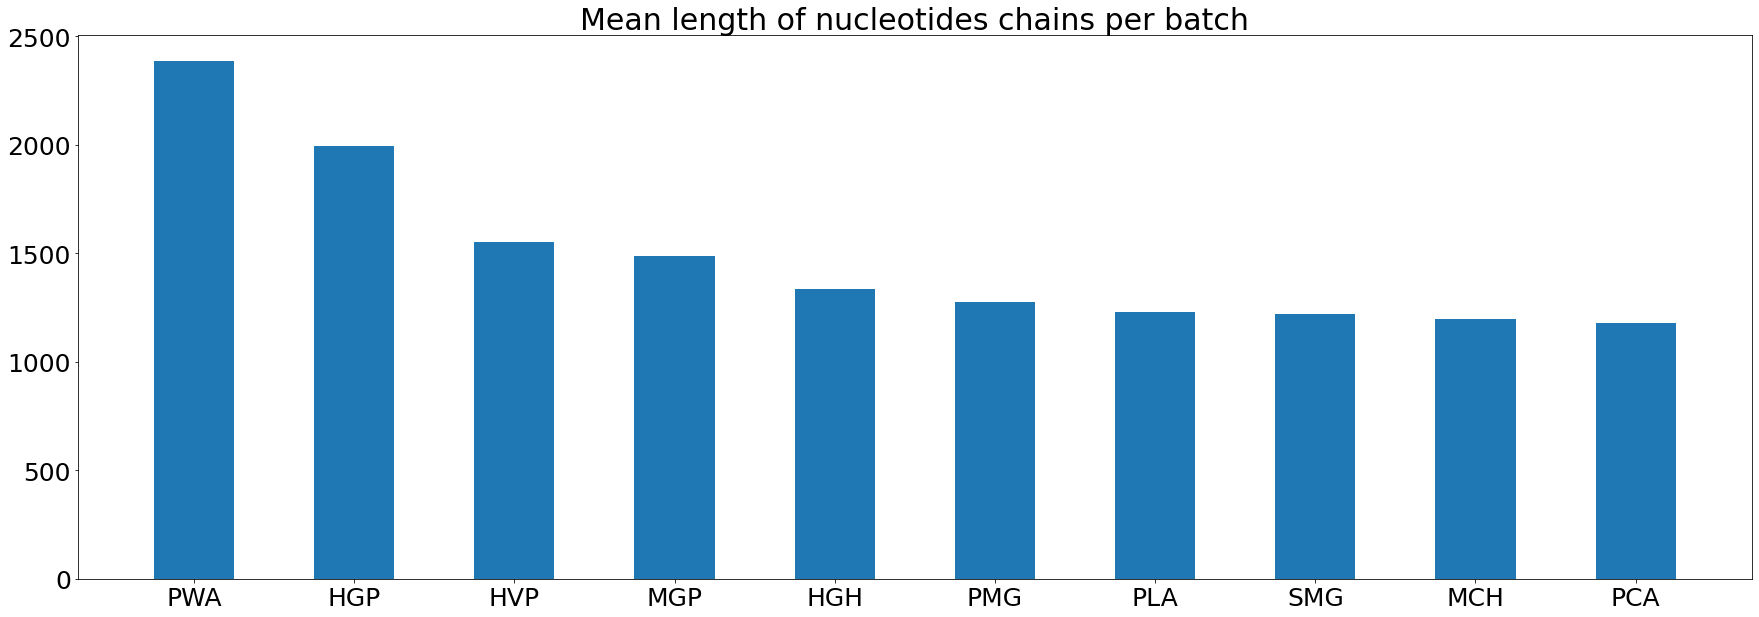

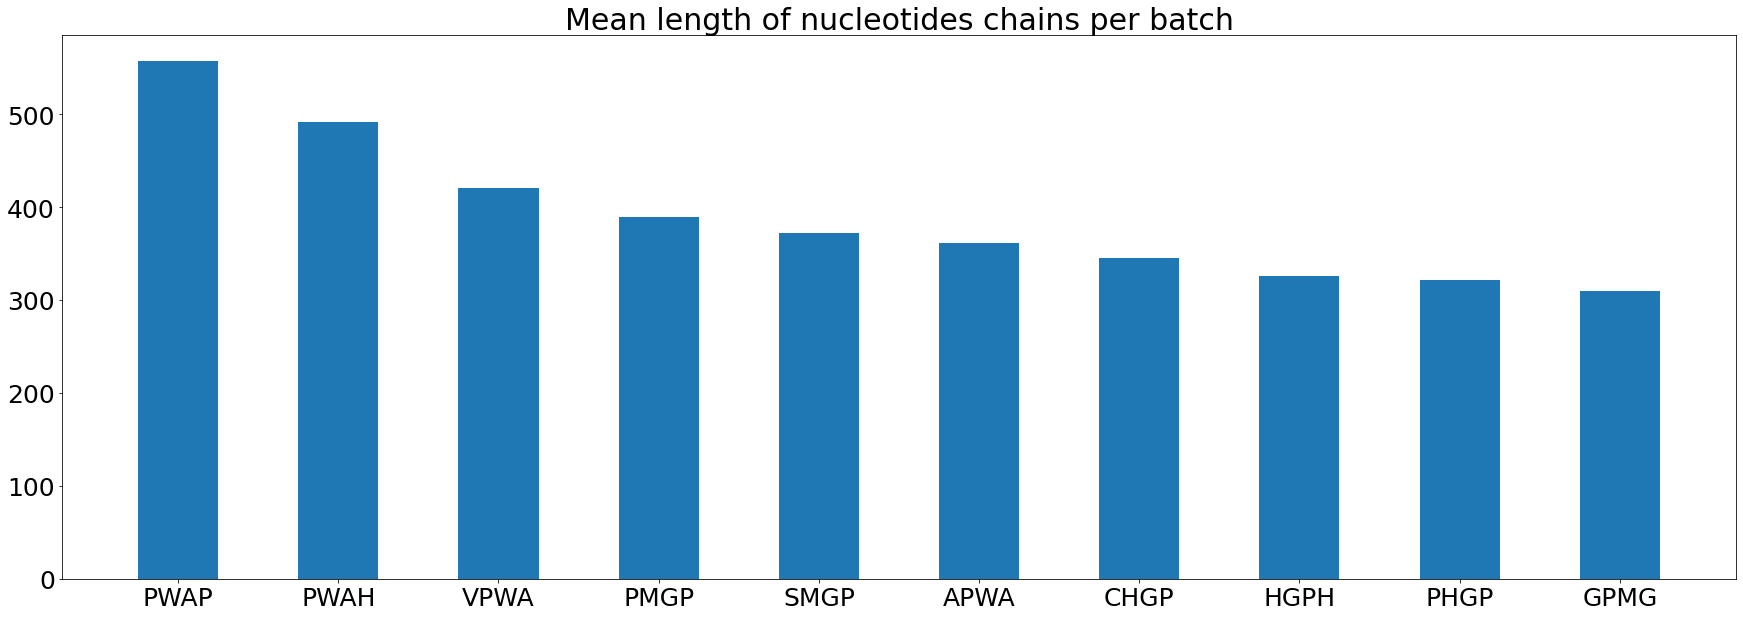

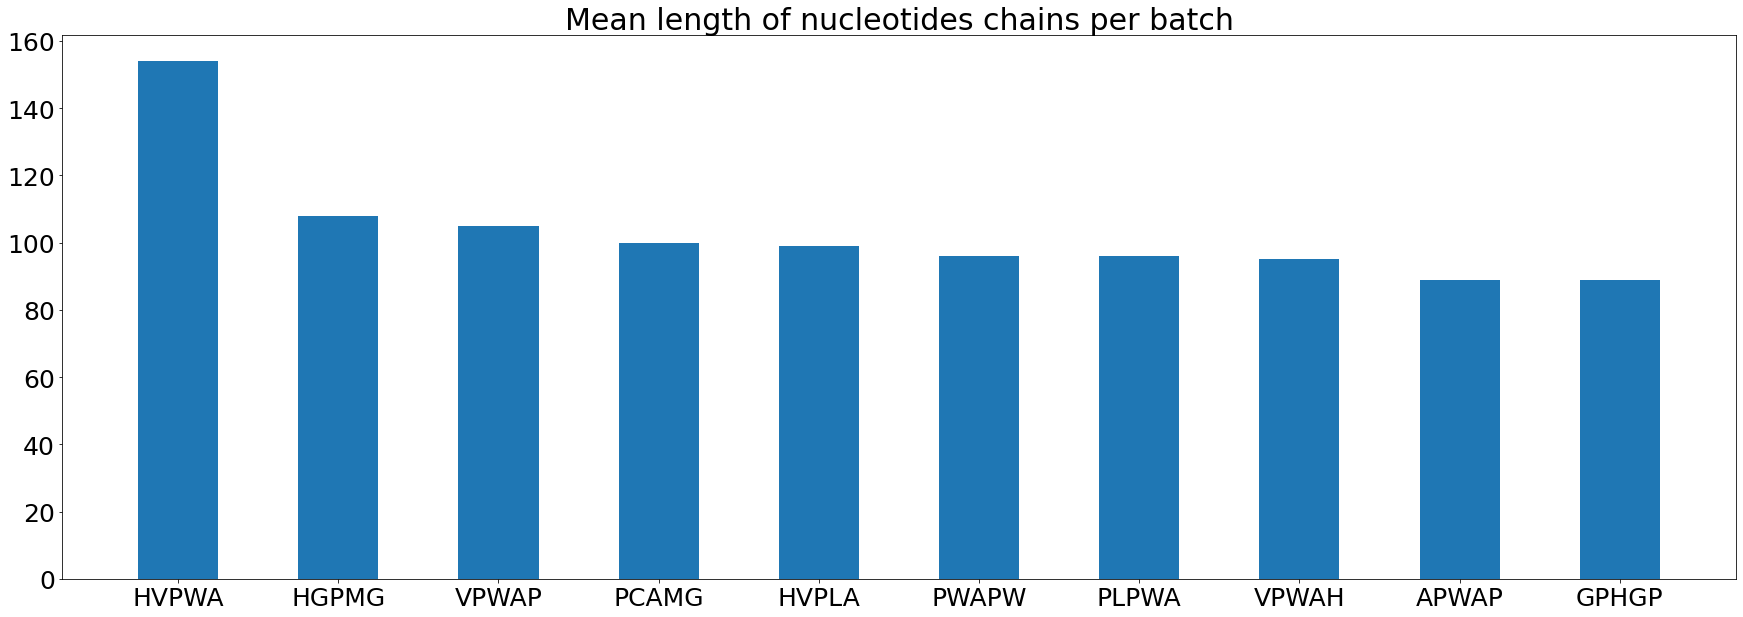

In [6]:
i = 130
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 25})
# path = './samples/fbgan_amp_demo/sampled_{}_preds.txt'.format(i)
path = './LargeSample/fb_gen.txt'
with open(path,encoding='utf-8') as f:
    content = f.read()
    lines = content.split('\n')
    tim = 0

    lines = geneToProtein(lines,verbose=False)

    for j in range(maxlen-2):
        modelen = j+3
        tim = 0
        for line in lines:
            for idx in range(len(line)):
                if idx+modelen < len(line):
                    tim += 1
                    cnt150.update(line[idx:idx+modelen],tim,modelen)
    # cnt150.calmean()
    topn = cnt150.sor(10)
    for i in range(maxlen-2):
        # print(topn[i+3])
        label = []
        count = []
        for pair in topn[i+3]:
            if i+3 >= 5 and len(label) >=10:
                break 
            label.append(pair[0])
            count.append(pair[1])
        plt.figure(figsize=(30,10))
        plt.bar(x=label,height=count,width=0.5)
        
        plt.title('Mean length of nucleotides chains per batch')
        figpath = './AMP/CNTModes_{}.png'.format(i+3)
        plt.savefig(figpath)
